In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.petri_net.util import performance_map 
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
import pm4py

In [2]:
eventlog = pm4py.read_xes('exportedPN.xes')

C:\Users\sssna\AppData\Local\Programs\Python\Python310\lib\site-packages\pm4py\util\dt_parsing\parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/600 [00:00<?, ?it/s]

In [9]:
log = log_converter.apply(eventlog)

In [10]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

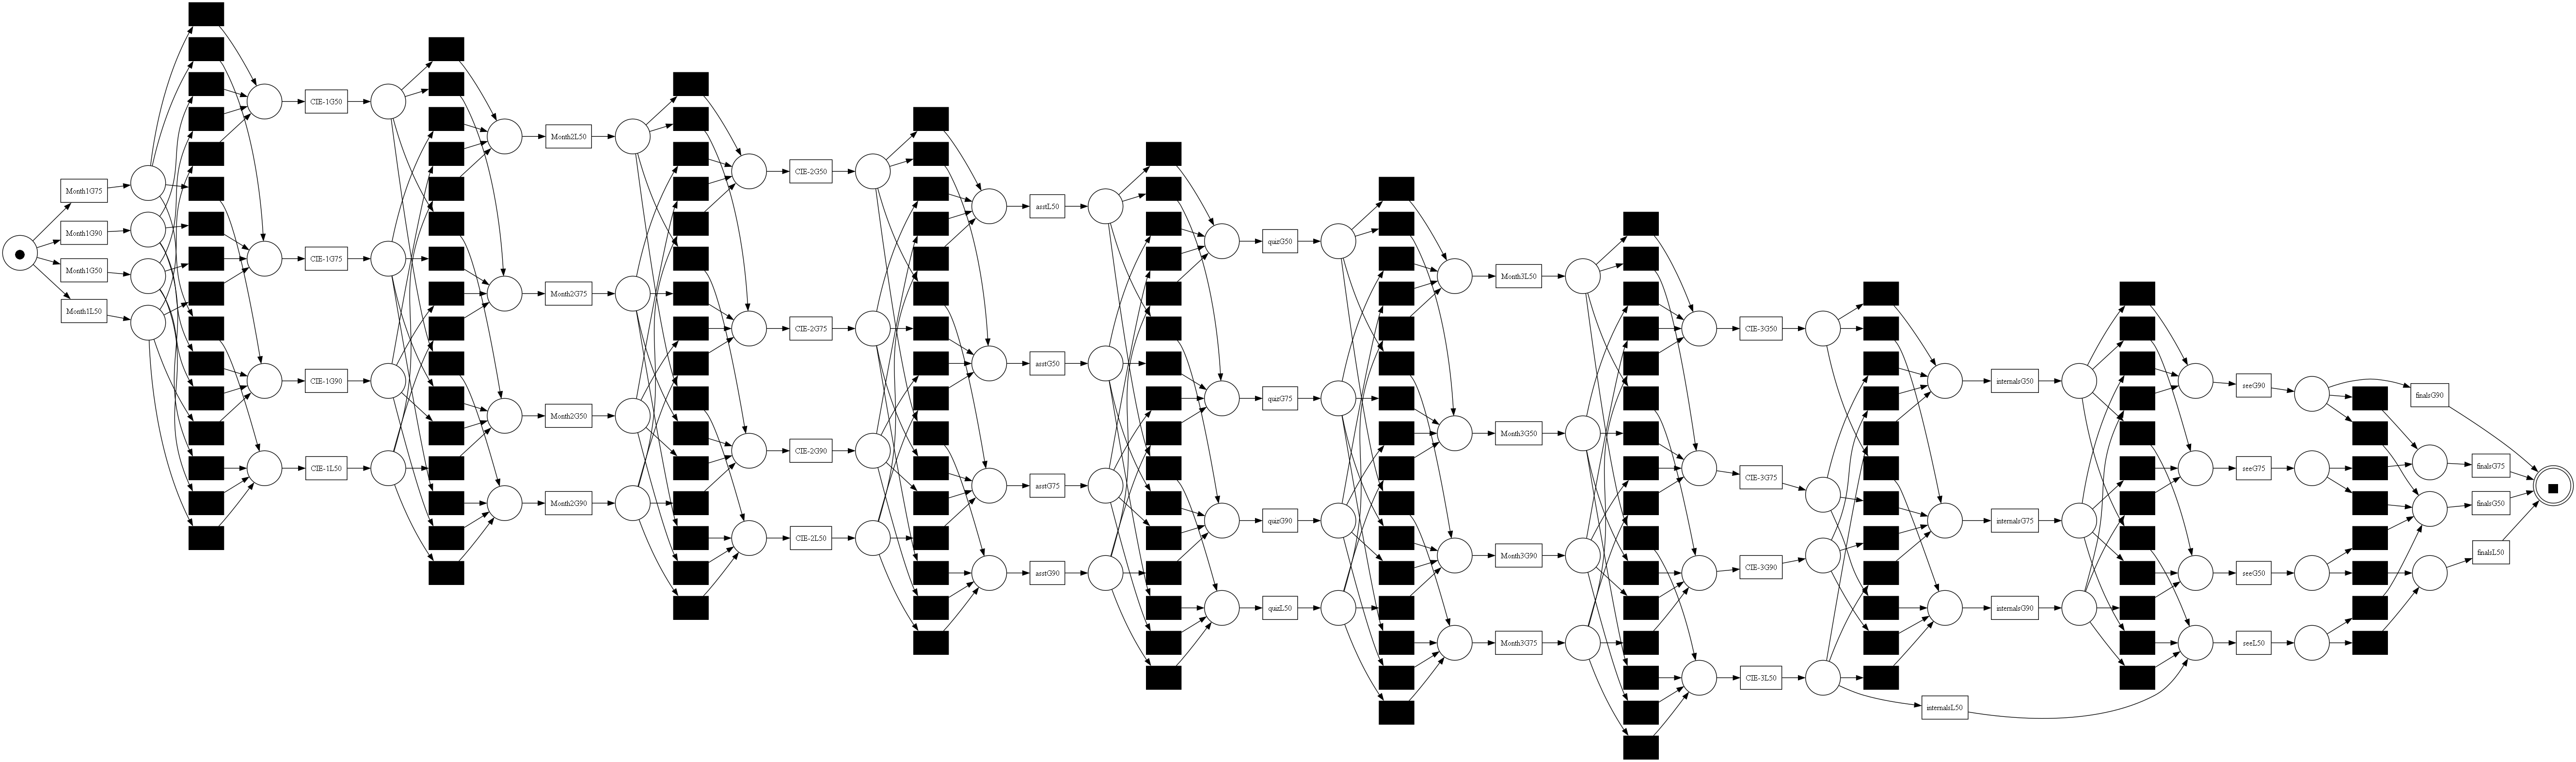

In [11]:
# heuristics miner algorithm returning model, initial marking and
# final marking
net, im, fm = heuristics_miner.apply(log)
# Petri net visualisation
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

C:\Users\sssna\AppData\Local\Programs\Python\Python310\lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


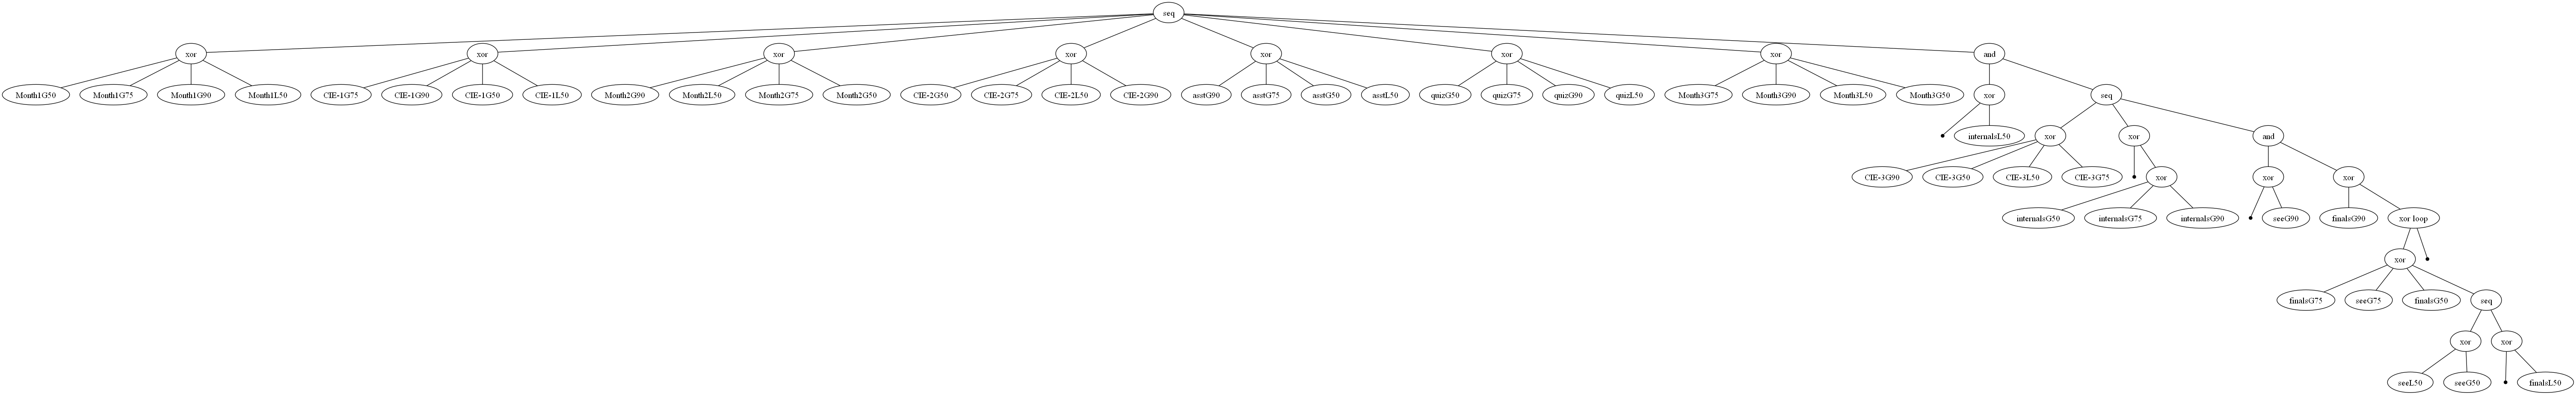

In [12]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
# Discover process tree using inductive miner
tree = pm4py.discover_process_tree_inductive(log)
pm4py.view_process_tree(tree)

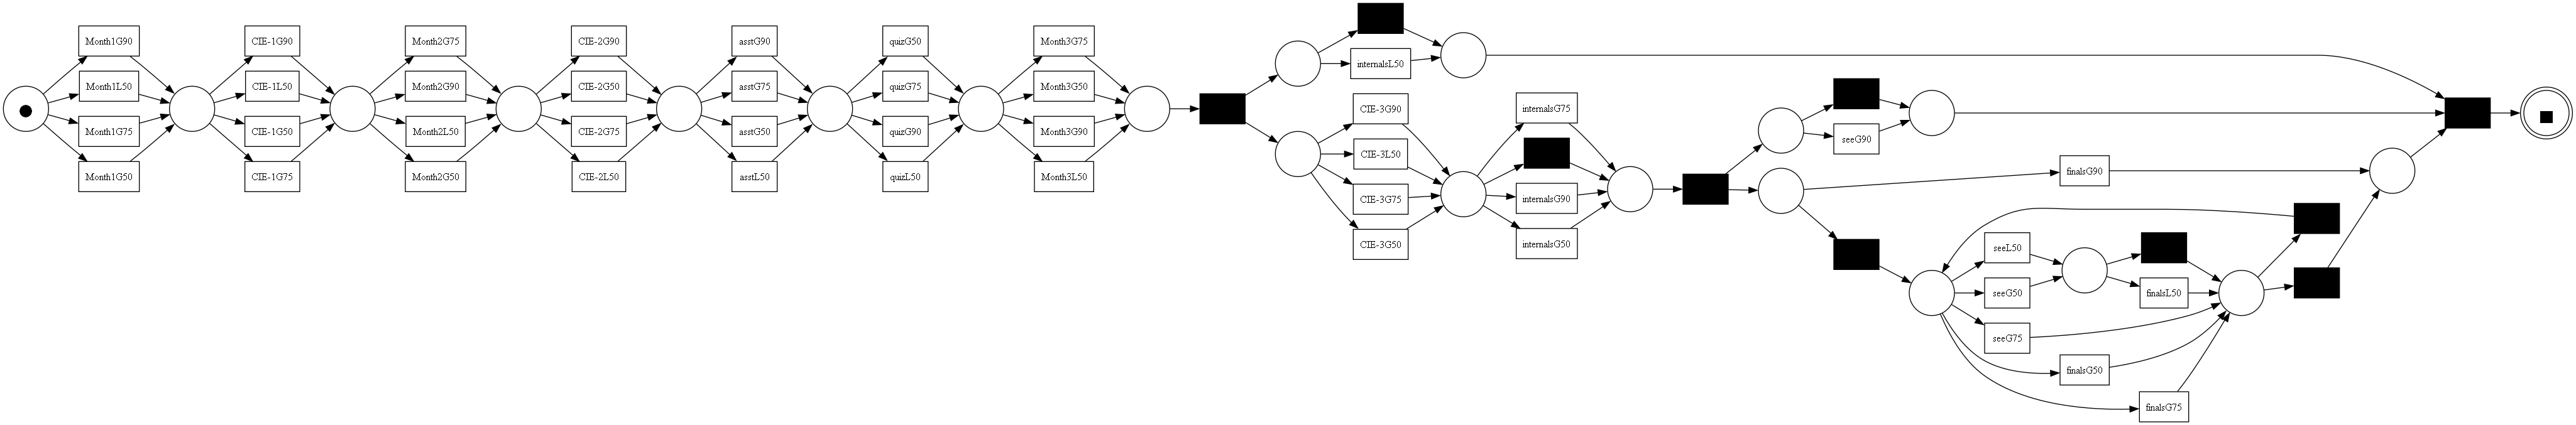

In [13]:
net1, im1, fm1 = pm4py.convert_to_petri_net(tree)
pm4py.view_petri_net(net1, im1, fm1)

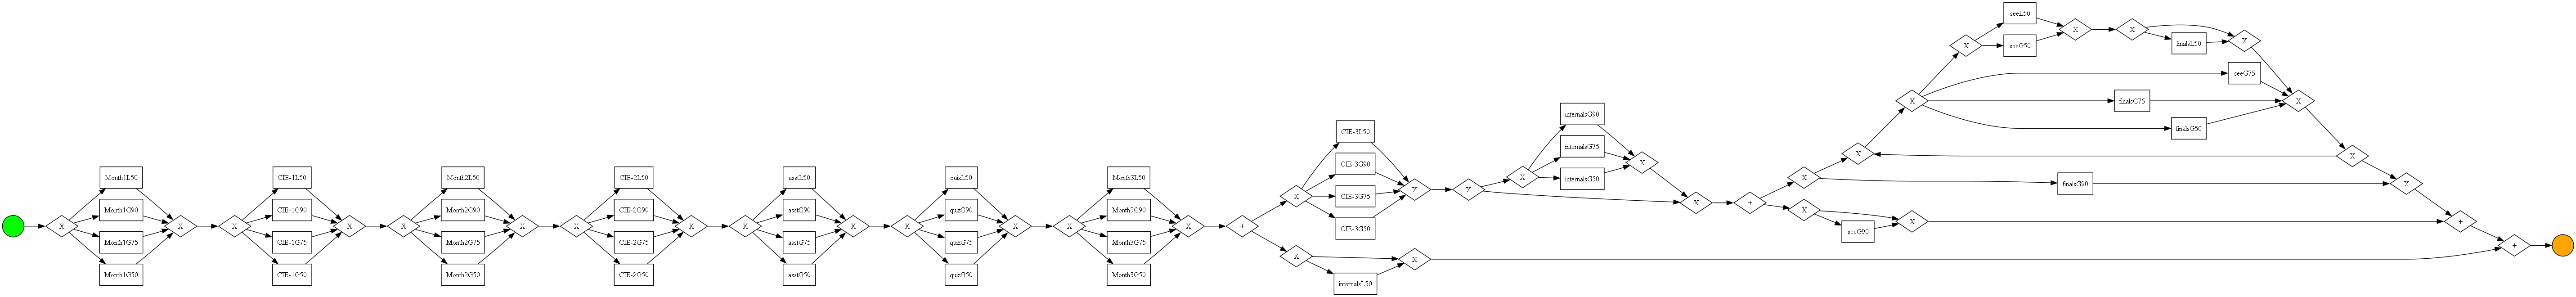

In [14]:
bm=pm4py.discover_bpmn_inductive(eventlog)
pm4py.view_bpmn(bm)

In [15]:
pm4py.write_pnml(net1, im1, fm1 , "petri.pnml")